## Clone the repository or your fork.

In [1]:
import os

repo_url = "https://github.com/sergioalberto/cypress-framework"

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

/content
fatal: destination path 'cypress-framework' already exists and is not an empty directory.
/content/cypress-framework
Already up to date.


## Import required packages

In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

## Load and analyze the images

In [3]:
# load the two input images
imageA = cv2.imread("visual-testing/images/store1.png")
imageB = cv2.imread("visual-testing/images/store2.png")

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

SSIM: 0.9870538027550323


## Show the output images

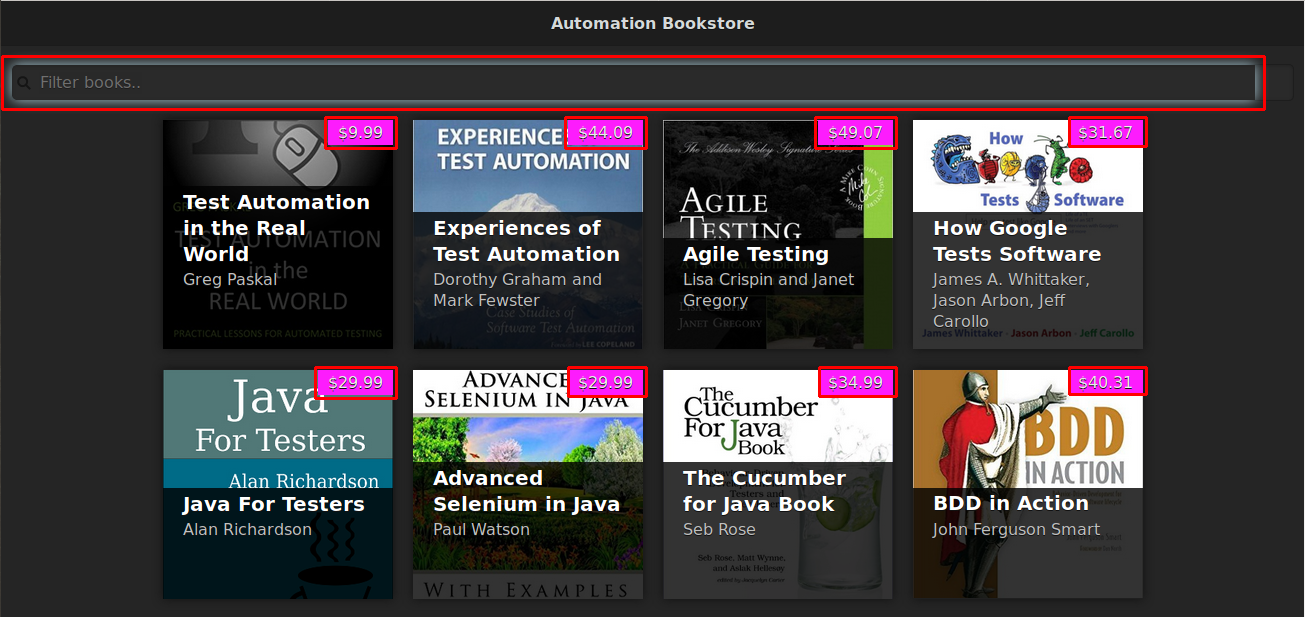

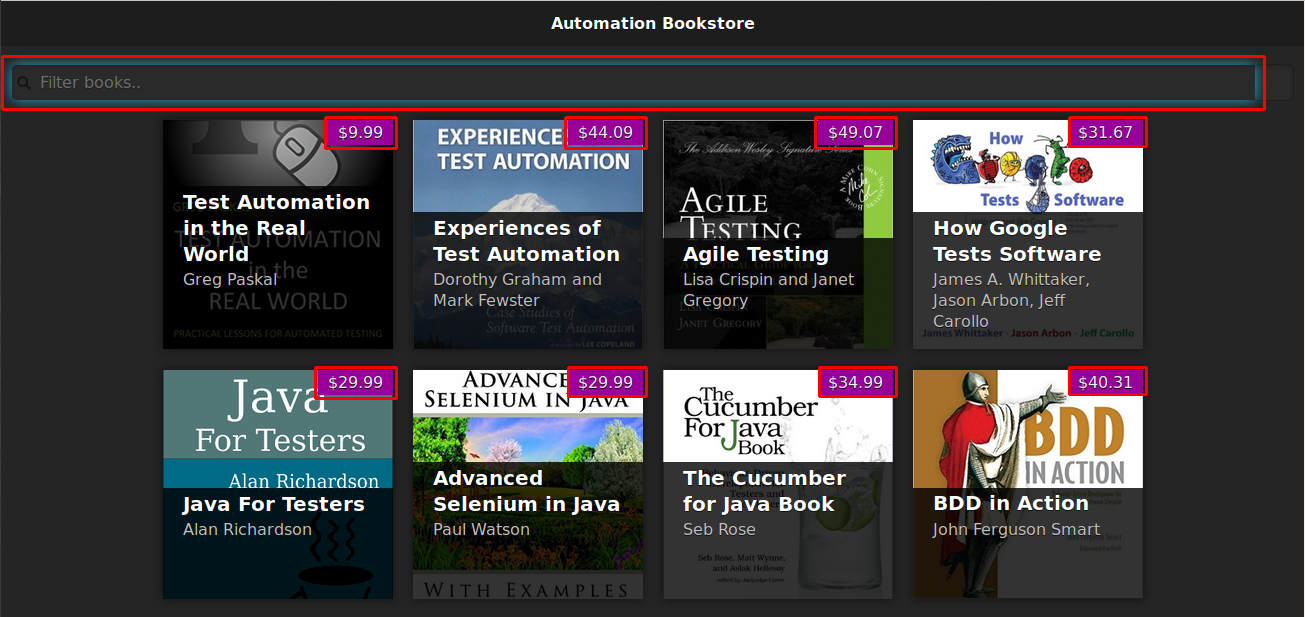

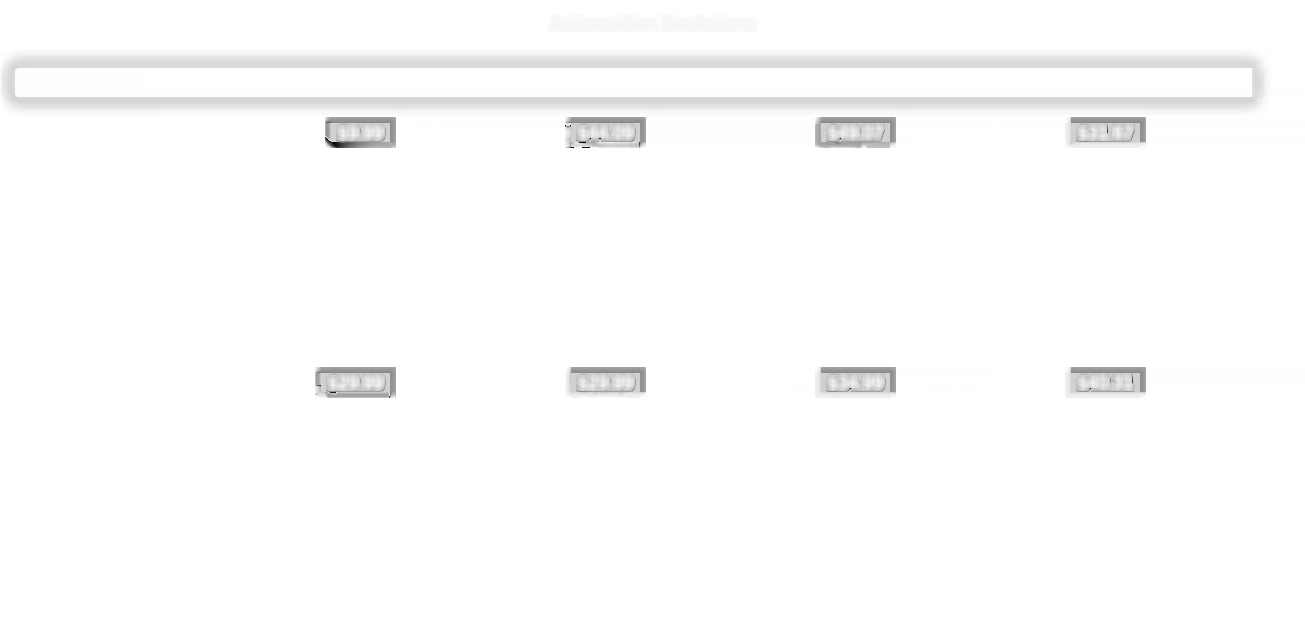

In [4]:
# Original
cv2_imshow(imageA)

# Modified
cv2_imshow(imageB)

# Diff
cv2_imshow(diff)